# CP101: Example 2.6

The following is the composition of a gas expressed as a weight percent.  Express the molar composition.


| gas | weight % | molecular mass           |
|:--- | --- | --- |
|             |          | g mol$^{-1}$ |
| O$_2$       |     16.0 |       32.0 |
| CO          |      4.0 |       28.0 |
| CO$_2$      |     17.0 |       44.0 |
| N$_2$       |     63.0 |       28.0 |


In [5]:
mass_dict = {'O2':16.0, 'CO':4, 'CO2':17, 'N2':63.0}
MolWt_dict = {'N2':28, 'O2':32, 'CO':28, 'CO2':44}



print( mass_dict.keys() )
print( mass_dict.values() )
print( mass_dict.items() )


dict_keys(['O2', 'CO', 'CO2', 'N2'])
dict_values([16.0, 4, 17, 63.0])
dict_items([('O2', 16.0), ('CO', 4), ('CO2', 17), ('N2', 63.0)])


In [10]:
moles_dict = {}
for compound, mass in mass_dict.items():
    moles = mass / MolWt_dict[compound]
    moles_dict[compound] = moles
    
total_moles = 0.0
for mole in moles_dict.values():
    total_moles += mole
print(total_moles)
    
print(moles_dict)

mol_frac = {}
for compound, moles in moles_dict.items():
    frac = moles/total_moles
    mol_frac[compound] = frac
    
print(mol_frac)


3.279220779220779
{'O2': 0.5, 'CO': 0.14285714285714285, 'CO2': 0.38636363636363635, 'N2': 2.25}
{'O2': 0.15247524752475247, 'CO': 0.04356435643564356, 'CO2': 0.11782178217821783, 'N2': 0.6861386138613862}


In [11]:
def get_x(mass_dict, M_dict):
    
    moles_dict = {}
    for compound, mass in mass_dict.items():
        moles = mass / M_dict[compound]
        moles_dict[compound] = moles
    
    total_moles = 0.0
    for mole in moles_dict.values():
        total_moles += mole
    
    mol_frac = {}
    for compound, moles in moles_dict.items():
        frac = moles/total_moles
        mol_frac[compound] = frac
    
    return mol_frac

In [16]:
mass_dict = {'O2':16.0, 'CO':4, 'CO2':17}
MolWt_dict = {'N2':28, 'O2':32, 'CO':28, 'CO2':44, 'CH4':44.0}


streamA = {'O2':54.0, 'CO':42, 'CO2':1}




xA = get_x(streamA, MolWt_dict)


print(xA)

{'O2': 0.5256637168141592, 'CO': 0.4672566371681416, 'CO2': 0.007079646017699115}


In [20]:
def f(x):
    
    w = x*x - 14.0
    print('hello')
    
    return w

In [21]:
y = f(2)
print(y)

hello
-10.0


### Shomate equation


The molar heat capacity is given by
\begin{align*}
C_p(T)
&= A + B t + C t^2 + D t^3 + E t^{-2}
\end{align*}
where $T$ is absolute temperature in kelvin, $t=T/1000$, $C_p$ is molar heat capacity in ${\rm J\,mol^{-1}\,K^{-1}}$, and $A$, $B$, $C$, $D$, and $E$ are constants


The parameters of the Shomate equation for nitrogen are given below (taken from the [NIST webbook](https://webbook.nist.gov/cgi/cbook.cgi?ID=C7727379&Type=JANAFG&Table=on#JANAFG)):

| Temperature / K | $100.$ - $500.$ | $500.$ - $2000.$ | $2000.$ - $6000.$ |
|:--- | ---:| ---:| ---:|
| $A$             |   $ 28.98641$ |    $ 19.50583$ |     $ 35.51872$ |
| $B$             |   $ 1.853978$ |    $ 19.88705$ |     $ 1.128728$ |
| $C$             |   $-9.647459$ |    $-8.598535$ |     $-0.196103$ |
| $D$             |   $ 16.63537$ |    $ 1.369784$ |     $ 0.014662$ |
| $E$             |   $ 0.000117$ |    $ 0.527601$ |     $-4.553760$ |


**Q:** What is the heat capacity for nitrogen at 100ºC? What about 1000ºC? 3000ºC?


In [26]:
def get_Cp(T):
    
    if (T <= 500.0):
        A =  28.98641
        B =  1.853978
        C = -9.647459
        D =  16.63537
        E =  0.000117
    elif (T < 2000.0):
        A =  19.50583
        B =  19.88705
        C = -8.598535
        D =  1.369784
        E =  0.527601
    elif (T <= 6000.0):
        A =  35.51872
        B =  1.128728
        C = -0.196103
        D =  0.014662
        E = -4.553760
    else:
        raise Exception('Error')
 
    t = T / 1000.0
    f = A + B*t + C*t**2 +D*t**3 + E/t**2
    
    return f

In [27]:
Cp = get_Cp(600)
print(Cp)

30.104019077333334


In [31]:
print( 500 != 2*250)

False


In [43]:
import numpy



print(numpy.pi)
numpy.log(numpy.pi / 2.0)

x = numpy.arange(0.0, 1.0, 0.1)

3.141592653589793


In [44]:
import numpy as np

np.log(1.5)

0.4054651081081644

In [47]:
from numpy import log, exp

log(1.5)
exp(1.6)

4.953032424395115

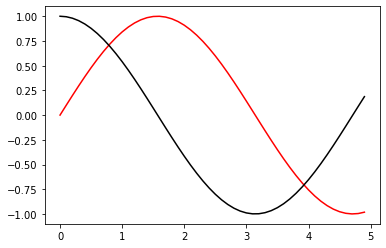

In [54]:
from pylab import plt



x_data = np.arange(0.0, 5.0, 0.1)
y_data = []
z_data = []
for x in x_data:
    y_data.append( np.sin(x))
    z_data.append( np.cos(x))

    
plt.plot(x_data, y_data, color='red')
plt.plot(x_data, z_data, color='black')



plt.show()


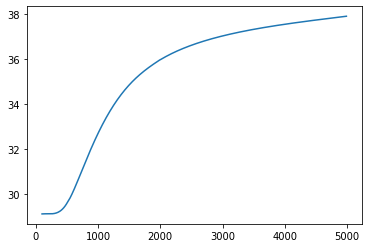

In [52]:
T_data = arange(100.0, 5000.0, 10.)
Cp_data = []
for T in T_data:
    Cp_data.append( get_Cp(T))
    
plt.plot(T_data, Cp_data)
plt.show()

In [57]:
import scipy as sp
from scipy.optimize import fsolve


def res(x):
    f = x - np.exp(-x)
    return f

x0 = 1.0
sol = fsolve(res, x0)

print(sol)


[0.56714329]


In [62]:
import sympy as s

x, y = s.symbols('x y')


f = x**3 * s.exp(x)

s.diff(f,x)

s.integrate(f, x)


(x**3 - 3*x**2 + 6*x - 6)*exp(x)